# Keras 코드의 기본 구조

## 데이터 준비

라이브러리 임포팅

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

데이터 로딩

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [ ]:
print(train_x[:5])
print(train_y[:5])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]
[15.2 42.3 50.  21.1 17.7]


## 모델 준비

### 모델 구조 정의

In [ ]:
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

### loss, optimizer 정의

학습에 필요한 loss, optimizer를 정의한다.

또한 필요한 경우 지표를 설정한다.

In [ ]:
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

### 모델 모양 보기

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 34ms/step - loss: 567.7636 - mae: 21.8933 - val_loss: 639.6313 - val_mae: 23.4977
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 563.5885 - mae: 21.6311 - val_loss: 636.8091 - val_mae: 23.3323
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 560.7601 - mae: 21.4912 - val_loss: 634.7740 - val_mae: 23.1708
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 559.2878 - mae: 21.4375 - val_loss: 634.1006 - val_mae: 23.1582
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 558.1843 - mae: 21.3857 - val_loss: 633.5298 - val_mae: 23.1471
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 557.4471 - mae: 21.3610 - val_loss: 633.0006 - val_mae: 23.1362
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 556.6680 - mae: 21.3411 - val_loss: 632.4716 - val_mae: 23.1234
Epoch 8/100
11/11 [=====================

학습 로스 보기

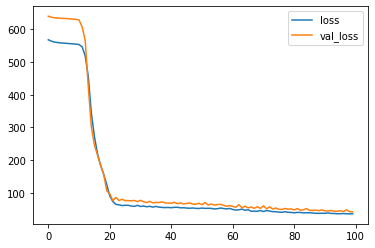

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

## 모델 평가

In [ ]:
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

4/4 [==============================] - 0s 4ms/step - loss: 43.8744 - mae: 4.9660
loss= 43.87443161010742
mae= 4.965980052947998


model.compile() 호출 시에 metrics에 설정한 지표에 따라 evaluate()의 반환 갯수가 결정된다.
```
model.compile(..., metrcis=[])
loss = model.evaluate(test_x, test_y)
```

```
model.compile(..., metrcis=["mae"])
loss, mae = model.evaluate(test_x, test_y)
```

```
model.compile(..., metrcis=["mae", "mape"])
loss, mae, mape = model.evaluate(test_x, test_y)
```



## 모델 예측

In [ ]:
y_ = model.predict(test_x)

예측 결과 보기

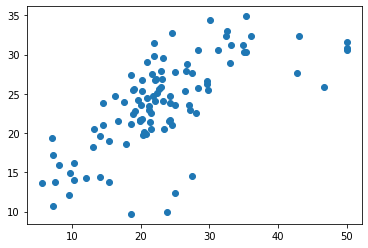

In [ ]:
plt.scatter(test_y, y_)
plt.show()

# Keras 코드 기본 구조 - 한눈에 보면

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/11 [==============================] - 1s 22ms/step - loss: 1479.9462 - mae: 37.3074 - val_loss: 1290.8944 - val_mae: 34.4471
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 997.6053 - mae: 30.1431 - val_loss: 894.4250 - val_mae: 28.0186
Epoch 3/10
11/11 [===========================

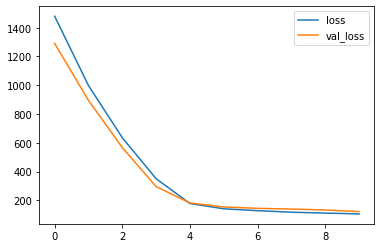

4/4 [==============================] - 0s 3ms/step - loss: 107.8122 - mae: 8.1779
loss= 107.81217193603516
mae= 8.177864074707031


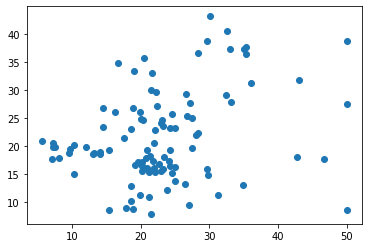

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()


# loss 설정

- 회귀 문제일 때는 "mse"

- 분류 문제일 때는 "sparse_categorical_crossentropy"

In [ ]:
model.compile(optimizer="Adam", loss="mse")

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy")

# optimizer 설정
- "Adam" / Adam()
- "Adadelta" / Adadelta()
- "Adagrad" / Adagrad()
- "RMSrop" / RMSprop()


In [ ]:
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, RMSprop

model.compile(optimizer="Adam", loss="mse")
model.compile(optimizer=Adam(), loss="mse")
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

model.compile(optimizer="Adagrad", loss="mse")
model.compile(optimizer=Adagrad(), loss="mse")
model.compile(optimizer=Adagrad(learning_rate=0.001), loss="mse")

model.compile(optimizer="Adadelta", loss="mse")
model.compile(optimizer=Adadelta(), loss="mse")
model.compile(optimizer=Adadelta(learning_rate=0.001), loss="mse")

model.compile(optimizer="RMSprop", loss="mse")
model.compile(optimizer=RMSprop(), loss="mse")
model.compile(optimizer=RMSprop(learning_rate=0.001), loss="mse")

# 모델 저장과 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/11 [==============================] - 1s 18ms/step - loss: 11516.1641 - val_loss: 8051.6357
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 5753.9658 - val_loss: 3568.5332
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 2418.4241 - val_loss: 1304.4751
Epoch 

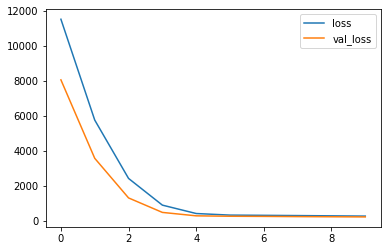

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse")
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

## 모델 저장

In [ ]:
model.save("my_model.h5")

## 모델 로딩

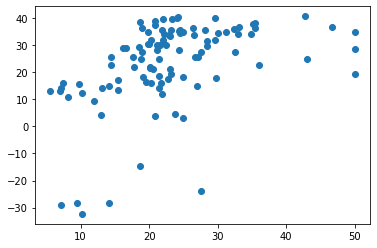

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

loaded_model = tf.keras.models.load_model("my_model.h5")


# 예측
y_ = loaded_model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()